Universidad del valle de Guatemala
Andres Quinto
Andree Toledo
Laboratorio 4 DS / Mineria de textos

In [1]:
import pandas as pd
import re
import nltk
import io 
import wordcloud as wc
import random
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.util import ngrams
from nltk import word_tokenize
from collections import Counter, defaultdict

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aeqv2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Colocamos los valores en lowercase para que no haya problemas con las mayusculas
df = pd.read_csv('train.csv')

df['text'].str.lower()
df['location'].str.lower()
df['keyword'].str.lower()
#print(df.head())

print(df)

         id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...       1  
7610  M1.94 [01:04 UT

In [3]:
#Eliminacion de caracteres especiales y signos de puntuacion
df.text = df.text.str.replace('[#,@,&,(,),!,?,/,{,},%,!]', '')
df.location = df.location.str.replace('[#,@,&,(,),!,?,/,{,},%,!]', '')
df.keyword = df.keyword.str.replace('[#,@,&,(,),!,?,/,{,},%,!]', '')
#Eliminacion de url
df.text = [re.sub('\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*','',i) for i in df.text]
df.text = [re.sub(r'^https?:\/\/.*[\r\n]*', '', i) for i in df.text]
#Eliminacion de emoticonos
df.text = [re.sub('[^a-zA-Z0-9 ]+','', i) for i in df.text]


c:\Users\aeqv2\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
c:\Users\aeqv2\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\aeqv2\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [4]:
print(df)

         id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this earthquake Ma...       1  
1                 Forest fire near La Ronge Sask Canada       1  
2     All residents asked to shelter in place are be...       1  
3     13000 people receive wildfires evacuation orde...       1  
4     Just got sent this photo from Ruby Alaska as s...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  ariaahrary TheTawniest The out of control wild...       1  
7610  M194 0104 UTC5k

In [5]:
#Eliminacion de conjunciones (stopwords)
import io 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from cgitb import text

#https://towardsdatascience.com/how-to-clean-text-data-639375414a2f 

stopwords = set(stopwords.words('english') + ['the', 'i', 'a', 'deeds', 'im','rt','jk','btw','lol','yolo','lmao','lmfao','fb','like','get','em', 'I', 'The', 'A', 'Amp', 'amp'])
expresiones = ['im','rt','jk','btw','lol','yolo','lmao','lmfao','fb','like','get','em', 'Im', 'in', 'In', '2']
for i in expresiones:
    stopwords.add(i)

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
# Creation of the colum named 'text without stopwords'
df['text_without_stopwords'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
# print(df.text)
clean_tweets = df['text_without_stopwords']
print(df['text_without_stopwords'])


0        Our Deeds Reason earthquake May ALLAH Forgive us
1                   Forest fire near La Ronge Sask Canada
2       All residents asked shelter place notified off...
3       13000 people receive wildfires evacuation orde...
4       Just got sent photo Ruby Alaska smoke wildfire...
                              ...                        
7608    Two giant cranes holding bridge collapse nearb...
7609    ariaahrary TheTawniest control wild fires Cali...
7610    M194 0104 UTC5km S Volcano Hawaii httptcozDtoy...
7611    Police investigating ebike collided car Little...
7612    Latest More Homes Razed Northern California Wi...
Name: text_without_stopwords, Length: 7613, dtype: object


#Obtencion de la frecuencia de las palabras tantoa de los tweets de desastres como de los que no.

In [6]:
frec_dic_tweets = {}
for word in clean_tweets:
    if word in frec_dic_tweets:
        frec_dic_tweets[word] += 1
    else:
        frec_dic_tweets[word] = 1

tweets_frecuency = pd.DataFrame.from_dict(frec_dic_tweets, orient='index')
tweets_frecuency


,0
Our Deeds Reason earthquake May ALLAH Forgive us,1
Forest fire near La Ronge Sask Canada,1
All residents asked shelter place notified officers No evacuation shelter place orders expected,1
13000 people receive wildfires evacuation orders California,1
Just got sent photo Ruby Alaska smoke wildfires pours school,1
...,...
Officials say quarantine place Alabama home possible Ebola case developing symptoms httptcorqKK15uhEY,1
flip side Walmart bomb everyone evacuate stay tuned blow,1
Suicide bomber kills 15 Saudi security site mosque Reuters via World Google News Wall httptconF4IculOje,1
Two giant cranes holding bridge collapse nearby homes httptcoSTfMbbZFB5,1


Que palabra se repite mas?

In [7]:
#Creacion de una lista de palabras para cada tweet
word_count = Counter()

for title in clean_tweets:
    word_count.update(word.strip('.,?!"\'').lower() for word in title.split())
#A continuacion se crea una lista con los 10 tweets mas frecuentes
word_count.most_common(10)

[('fire', 250),
 ('new', 226),
 ('via', 220),
 ('dont', 206),
 ('people', 196),
 ('one', 191),
 ('news', 187),
 ('video', 164),
 ('us', 162),
 ('emergency', 156)]

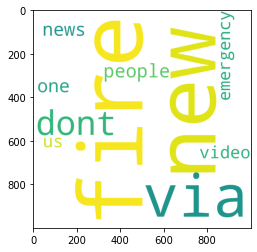

In [8]:
cloud_tweet = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(word_count)
plt.imshow(cloud_tweet)

#Grafico de barras para las palabras mas repetidas

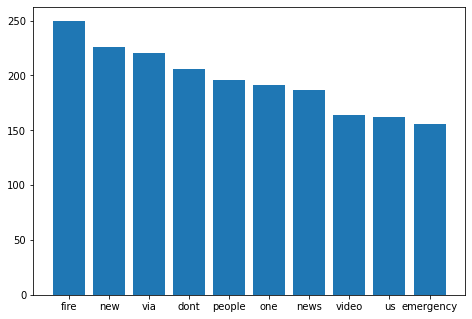

In [9]:
datos_tweet = word_count.most_common(10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis = [i[0] for i in datos_tweet]
y_axis = [i[1] for i in datos_tweet]
ax.bar(x_axis,y_axis)
plt.show()

N-Grama

In [10]:
global_data = df['text_without_stopwords']

print(global_data)

0        Our Deeds Reason earthquake May ALLAH Forgive us
1                   Forest fire near La Ronge Sask Canada
2       All residents asked shelter place notified off...
3       13000 people receive wildfires evacuation orde...
4       Just got sent photo Ruby Alaska smoke wildfire...
                              ...                        
7608    Two giant cranes holding bridge collapse nearb...
7609    ariaahrary TheTawniest control wild fires Cali...
7610    M194 0104 UTC5km S Volcano Hawaii httptcozDtoy...
7611    Police investigating ebike collided car Little...
7612    Latest More Homes Razed Northern California Wi...
Name: text_without_stopwords, Length: 7613, dtype: object


In [11]:
val=round(len(global_data)*0.1,0)
random_sample=random.sample(global_data,int(val))

TypeError: Population must be a sequence or set.  For dicts, use list(d).

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
digrama=[]
print(digrama)
size=2
def ngram(ngrama, size):
  for word in range(len(random_sample)):
    try:
      for item in ngrams(random_sample[word].split(),size):
          ngrama.append(item)
    except:
        return

ngram(digrama, size)
print(digrama)

In [ ]:
trigrama=[]
print(trigrama)
size=3
ngram(trigrama, size)
print(trigrama)

In [ ]:
tetragrama=[]
print(tetragrama)
size=4
ngram(tetragrama, size)
print(tetragrama)

In [ ]:
pentgrama=[]
print(pentgrama)
size=5
ngram(pentgrama, size)
print(pentgrama)